**05: Feature Selection**

Importing required modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

import os
import pickle
import datetime
import warnings
import re

In [2]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

Directory variables

In [3]:
data_path = r"C:\Data\Study\Ai_adventures\Projects\Machine_Learning\Regression\DengAi_Disease spread prediction\outputs\transformed_data.pkl"
model_path = r"C:\Data\Study\Ai_adventures\Projects\Machine_Learning\Regression\DengAi_Disease spread prediction\models\final_model.pkl"
output_dir = r"C:\Data\Study\Ai_adventures\Projects\Machine_Learning\Regression\DengAi_Disease spread prediction\outputs"
transformer_dir = r"C:\Data\Study\Ai_adventures\Projects\Machine_Learning\Regression\DengAi_Disease spread prediction\transformers"

Loading data and model

In [4]:
with open(data_path, "rb") as file:
    data = pickle.load(file)

In [5]:
with open(model_path, "rb") as file:
    model = pickle.load(file)

In [6]:
data.head()

,city,day,month,day_of_week,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1,30,4,0,1990,18,-0.016536,-0.045015,0.110036,-0.082612,-0.744185,-0.943302,-1.214591,-1.619633,-1.387852,-0.329611,0.335308,-1.566752,-0.744185,-1.587135,-0.368641,-1.291053,-0.300128,-1.448836,-1.484469,-0.272887,4
1,1,7,5,0,1990,19,0.377020,0.301500,-0.478241,-0.436839,-0.314551,-0.487879,-0.700195,-0.930554,-0.676998,-0.111301,-0.408830,-0.523304,-0.314551,-0.930743,-0.651463,-0.492902,-0.749960,-0.388845,-0.047147,-0.800602,5
2,1,14,5,0,1990,20,-0.792355,0.568155,-0.567387,-0.187652,0.097705,-0.071461,-0.367098,-0.035477,-0.919344,0.354113,0.061403,0.354093,0.097705,-0.045380,-0.738630,-0.492902,-0.645358,-0.133716,0.351279,0.798169,4
3,1,21,5,0,1990,21,0.034186,1.163593,0.537103,0.709611,-0.616682,0.081599,-0.090599,-0.124142,-0.400195,0.187881,-0.685225,0.075074,-0.616682,-0.164520,-0.584496,0.085830,-0.401578,0.476215,0.685422,-1.191951,3
4,1,28,5,0,1990,22,0.592251,1.300171,0.861593,0.847845,-0.967240,0.483642,0.267015,0.263463,-0.152622,0.471071,-0.810182,0.096439,-0.967240,0.215625,-0.025532,1.544761,0.952789,1.553328,1.088514,-1.032905,6


In [7]:
model

GradientBoostingRegressor(learning_rate=0.01, min_samples_leaf=3,
                          min_samples_split=3, n_estimators=500)

Features and Labels

In [8]:
X = data.drop(columns=["total_cases"])
y = data.total_cases
X.shape, y.shape

((1114, 26), (1114,))

Splitting data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Feature selection

In [10]:
dummy_model = model
dummy_model

GradientBoostingRegressor(learning_rate=0.01, min_samples_leaf=3,
                          min_samples_split=3, n_estimators=500)

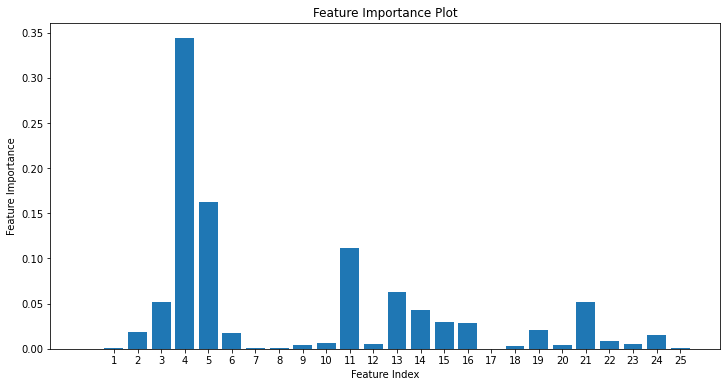

In [11]:
plt.figure(figsize=(12,6))
if hasattr(model, 'feature_importances_'):
    feature_importance = dummy_model.feature_importances_
    plt.bar(range(len(feature_importance)), feature_importance)
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Importance')
    plt.title('Feature Importance Plot')
    plt.xticks(range(1, 26))
    plt.show()

In [12]:
max_components = X.shape[1]
mae_summary = {}

for k in range(1, max_components):
    selector = SelectKBest(score_func=mutual_info_regression, k=k)
    X_new_train = selector.fit_transform(X_train, y_train)
    X_new_test = selector.transform(X_test)
    
    # Train the dummy model on the selected features
    dummy_model.fit(X_new_train, y_train)
    
    # Make predictions and calculate MSE
    y_preds = dummy_model.predict(X_new_test)
    mae = mean_absolute_error(y_test, y_preds)
    
    # Store the MSE in the summary dictionary
    mae_summary[f"features[{k}]"] = mae

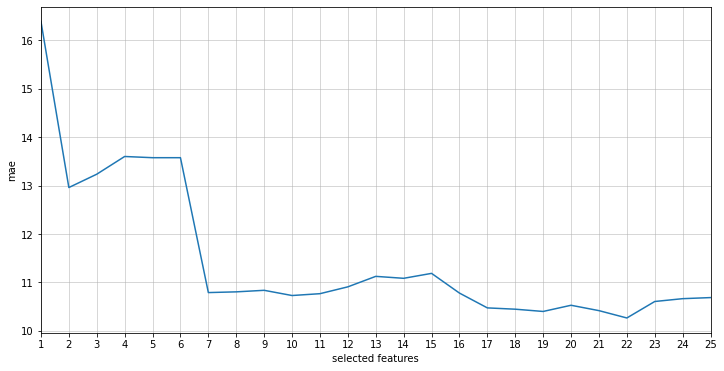

In [13]:
plt.figure(figsize=(12,6))
plt.plot(range(1,26),mae_summary.values())
plt.xlabel("selected features")
plt.ylabel("mae")
plt.xlim(1,25)
plt.xticks(range(1, 26))
plt.grid(linewidth=0.5)
plt.show()

In [14]:
def optimal_k(summary):
    record = sorted(mae_summary.items(), key=lambda item: item[1])[0]
    feature = record[0]
    k = re.findall("\d+",feature)[0]
    return int(k)

In [15]:
selector_2 = SelectKBest(score_func=mutual_info_regression, k=optimal_k(mae_summary))
X_selected = selector_2.fit_transform(X, y)

In [16]:
transformer_data_path = os.path.join(transformer_dir, "selector.pkl")
with open(transformer_data_path, "wb") as file:
    pickle.dump(selector_2, file)
    print("Selector saved successfully")

Selector saved successfully


In [17]:
selected_features_df = pd.DataFrame(data=np.c_[X_selected, y], columns=[f"feature_{i+1}" for i in range(X_selected.shape[1])] + ["total_cases"])

In [18]:
selected_features_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,total_cases
0,1.0,4.0,0.0,1990.0,18.0,-0.016536,-0.045015,0.110036,-0.082612,-0.744185,-0.943302,-1.214591,-1.387852,-0.329611,-1.566752,-0.744185,-0.368641,-1.291053,-0.300128,-1.448836,-1.484469,-0.272887,4.0
1,1.0,5.0,0.0,1990.0,19.0,0.377020,0.301500,-0.478241,-0.436839,-0.314551,-0.487879,-0.700195,-0.676998,-0.111301,-0.523304,-0.314551,-0.651463,-0.492902,-0.749960,-0.388845,-0.047147,-0.800602,5.0
2,1.0,5.0,0.0,1990.0,20.0,-0.792355,0.568155,-0.567387,-0.187652,0.097705,-0.071461,-0.367098,-0.919344,0.354113,0.354093,0.097705,-0.738630,-0.492902,-0.645358,-0.133716,0.351279,0.798169,4.0
3,1.0,5.0,0.0,1990.0,21.0,0.034186,1.163593,0.537103,0.709611,-0.616682,0.081599,-0.090599,-0.400195,0.187881,0.075074,-0.616682,-0.584496,0.085830,-0.401578,0.476215,0.685422,-1.191951,3.0
4,1.0,5.0,0.0,1990.0,22.0,0.592251,1.300171,0.861593,0.847845,-0.967240,0.483642,0.267015,-0.152622,0.471071,0.096439,-0.967240,-0.025532,1.544761,0.952789,1.553328,1.088514,-1.032905,6.0


In [19]:
print(f"Shape of selected features and labels dataframe: {selected_features_df.shape}")

Shape of selected features and labels dataframe: (1114, 23)


Saving the data

In [20]:
# Save the concatenated dataframe to the output folder
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

concatenated_path = os.path.join(output_dir, "selected_features_and_labels.pkl")
selected_features_df.to_pickle(concatenated_path)

print(f"Selected features and labels saved")

Selected features and labels saved
